# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. Interesting questions to consider include:
- Where and when do major power outages tend to occur?
- What are the characteristics of major power outages with higher severity? Variables to consider include location, time, climate, land-use characteristics, electricity consumption patterns, economic characteristics, etc. What risk factors may an energy company want to look into when predicting the location and severity of its next major power outage?
- What characteristics are associated with each category of cause?
- How have characteristics of major power outages changed over time? Is there a clear trend?

### Getting the Data
The data is downloadable [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks).

A data dictionary is available at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

### Cleaning and EDA
- Note that the data is given as an Excel file rather than a CSV. Open the data in Excel or another spreadsheet application and determine which rows and columns of the Excel spreadsheet should be ignored when loading the data in pandas.
- Clean the data.
    - The power outage start date and time is given by `OUTAGE.START.DATE` and `OUTAGE.START.TIME`. It would be preferable if these two columns were combined into one datetime column. Combine `OUTAGE.START.DATE` and `OUTAGE.START.TIME` into a new datetime column called `OUTAGE.START`. Similarly, combine `OUTAGE.RESTORATION.DATE` and `OUTAGE.RESTORATION.TIME` into a new datetime column called `OUTAGE.RESTORATION`.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: pandas can load multiple filetypes: `pd.read_csv`, `pd.read_excel`, `pd.read_html`, `pd.read_json`, etc.*

*Hint 2: `pd.to_datetime` and `pd.to_timedelta` will be useful here.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
- Assess the missingness of a column that is not missing by  design.

### Hypothesis Test
Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
Our dataset 'outages' included data from events of power outages caused by different reasons throuout the nation. Our dataset included information such as the duration of the power outage, the region, the price of the power and more. By understanding our given data, we narrowed our focus and chose to investigate the two regions of Central and Northeast and see how their power outages are more likely caused by 'severe weather'. By doing this, we will use a hypothesis test, more specifically a permutation test to compare the likeliness of a power outage being caused because of severe weather.

### Cleaning and EDA
For the data cleaning portion of this project, we were able to combine the OUTAGE.START.DATE and OUTAGE.START.TIME columns in order to create one datetime column called OUTAGE.START. We did this by creating a function which combines these two types of columns into one datetime column.  By creating this function, we were also able to combine the columns OUTAGE.RESTORATION.DATE and OUTAGE.RESTORATION.TIME into one column called OUTAGE.RESTORATION.  We then chose to use specific columns because not all columns were necessary to use for our investigation.   

### Assessment of Missingness
For the assessment of missingness we used KS statistic with a confidence interval of 95%.  Our cutoff is 0.05 to determine significance level and comparison between columns.

We believe the values of column "CAUSE.CATEGORY.DETAIL" is an example of MAR because we see that there is a possible reasoning for some of the NaN values. There is a dependent relationship between columns "CAUSE.CATEGORY.DETAIL" and "CAUSE.CATEGORY". If the "CAUSE.CATEGORY.DETAIL" is NaN we can see that we already have information for that value because the "CAUSE.CATEGORY" column already gives us relevant information for the reason of the power outage. However, some of the values are ambiguous and we investigate this more by using statistical tests to determine a p-value.

In contrast, the column "CLIMATE.REGION" is not dependent on the "CAUSE.CATEGORY" column.  We can see that the p-value resulted around 0.44 which is far above our cutoff value of 0.05.  We deem this as insignificant and there is no strong correlation between the two columns.

For the assessment of missingness, we decided to fill all NaN values with a 0 in the table because this means it is not the corresponding cause of the outage for that particular outage case. This also makes our hypothesis testing results smoother when computing. 

### Hypothesis Test
Null Hypothesis: The Northeast region have a greater likeliness than Central of a power outage being caused because of severe weather.

Alternative Hypothesis: The Central region have a greater likeliness than Northeast of a power outage being caused because of severe weather.

With using a test statistic of difference of means between the two regions of Northeast and Central, we were able to find a quantitative way to compare the likeliness of 'severe weather' being a major cause for the power outages. We decided to use this test statistic, difference of means, beacause we wanted to compare the difference in the averages of reasons between the two regions. This test statistic was the most relevant to what we are trying to find. With a signifance value of 0.1, we want to use a permutation test to see compare the likeliness of a power outage being caused because of severe weather.

### Conclusion

Going back to our initial null hypothesis: The Northeast region has a greater likeliness than Central for a power outage being caused because of severe weather.

We can say that we reject to accept our null hypothesis because our p-value has a consistent value far from our set significance value of 0.1. With getting a value of 0.5 for our p-value, we can not conclude a significant difference exists between the Northeast and Central regions.

From our given data the Northeast region does not necessarily have a greater likeliness than Central for a power outage being caused because of severe weather.

Some ways that we may want to improve our testing and findings would be to have a larger sample size in order to get a more accurate conclusion. This could either mean we have more information/data from a larger dataset from years before. Another way we could improve our findings is to compare with other regions of the given information/data in order to determine if there is more significance with "severe weather".

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy.stats import ks_2samp
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

For our cleaning portion, we use the method data_types in order to clearly keep track of the type of data we want each column to be from our raw data, 'outages'. We also created a helper function, 'helper_combine' in order to have a template to combine our time columns of "OUTAGE.START" and "OUTAGE.RESTORATION". 

In [2]:
def data_types():
    dict = {'YEAR': "int", 'MONTH': "int", 'U.S._STATE': "str", 'POSTAL.CODE': "str", 'NERC.REGION': "str",
       'CLIMATE.REGION': "str", 'ANOMALY.LEVEL': "float", 'CLIMATE.CATEGORY': "str", 'CAUSE.CATEGORY': "str",
       'CAUSE.CATEGORY.DETAIL': "str", 'HURRICANE.NAMES': "str", 'OUTAGE.DURATION': "int",
       'DEMAND.LOSS.MW': "int", 'CUSTOMERS.AFFECTED': "float", 'RES.PRICE': "float", 'COM.PRICE': "float",
       'IND.PRICE': "float", 'TOTAL.PRICE': "float", 'RES.SALES':"int", 'COM.SALES':"int", 'IND.SALES': "int",
       'TOTAL.SALES': "int", 'RES.PERCEN': "float", 'COM.PERCEN': "float", 'IND.PERCEN': "float",
       'RES.CUSTOMERS':"int", 'COM.CUSTOMERS':"int", 'IND.CUSTOMERS':"int", 'TOTAL.CUSTOMERS':"int",
       'RES.CUST.PCT': "float", 'COM.CUST.PCT': "float", 'IND.CUST.PCT': "float", 'PC.REALGSP.STATE': "int",
       'PC.REALGSP.USA':"int", 'PC.REALGSP.REL':"float", 'PC.REALGSP.CHANGE': "float", 'UTIL.REALGSP': "int",
       'TOTAL.REALGSP': "int", 'UTIL.CONTRI': "float", 'PI.UTIL.OFUSA': "float", 'POPULATION':"int",
       'POPPCT_URBAN' : "float", 'POPPCT_UC': "float", 'POPDEN_URBAN': "float", 'POPDEN_UC': "float",
       'POPDEN_RURAL': "float", 'AREAPCT_URBAN': "float", 'AREAPCT_UC': "float", 'PCT_LAND': "float",
       'PCT_WATER_TOT': "float", 'PCT_WATER_INLAND': "float", 'OUTAGE.START': "Timestamp",
       'OUTAGE.RESTORATION':"Timestamp"}
    return dict 

def helper_combined(df, col1, col2, combined_col):
    df[combined_col] = df[col1].astype(str).str[:-9] +  " " + df[col2].astype(str)
    df[combined_col] = df[combined_col].replace({" nan": np.NaN})
    df[combined_col] = pd.to_datetime(df[combined_col])
    df = df.drop([col1, col2], axis = 1)
    return df

In this cell we continued to clean up the original data by combining two columns using our helper_combined method in order to organize our data. The datetime column that we created makes it easier to compare columns in our findings. 
We also found it relevant to filter out the relevant columns for our particular question in order to have a smaller and more efficient dataframe. 

In [3]:
# read in the excel sheet to be analyzed
outage = pd.read_excel('outage.xlsx', dtype = data_types())
outage.columns = outage.iloc[4]
outage = outage.iloc[6:].reset_index().drop(["variables", "index", "OBS"], axis = 1)
outage[["CAUSE.CATEGORY","HURRICANE.NAMES"]][outage["CAUSE.CATEGORY"] == 'hurricane']

# calls helper_combined method created above in order to combine columns to make one datetime column
outage = helper_combined(outage, "OUTAGE.START.DATE", "OUTAGE.START.TIME", "OUTAGE.START")
outage = helper_combined(outage, "OUTAGE.RESTORATION.DATE", "OUTAGE.RESTORATION.TIME", "OUTAGE.RESTORATION")
outage = outage[["YEAR", "CLIMATE.REGION", "CAUSE.CATEGORY","CAUSE.CATEGORY.DETAIL", "OUTAGE.START", "OUTAGE.RESTORATION"]]
outage.head()

4,YEAR,CLIMATE.REGION,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,OUTAGE.START,OUTAGE.RESTORATION
0,2011,East North Central,severe weather,NaN,2011-07-01 17:00:00,2011-07-03 20:00:00
1,2014,East North Central,intentional attack,vandalism,2014-05-11 18:38:00,2014-05-11 18:39:00
2,2010,East North Central,severe weather,heavy wind,2010-10-26 20:00:00,2010-10-28 22:00:00
3,2012,East North Central,severe weather,thunderstorm,2012-06-19 04:30:00,2012-06-20 23:00:00
4,2015,East North Central,severe weather,NaN,2015-07-18 02:00:00,2015-07-19 07:00:00


Here we are continuing to clean our data for our testing filtering only the appropriate regions needed and filter out all other regions besides "Central" and "Northeast". We do this to help our data be more specific to our overall question. 

By grouping the year, categories, and regions we get a pivot table that displays the data clearer in order to perform our permutation test. 

In [4]:
#taking only "Central" and "Northeast" rows from the "outage" dataframe
filtered_regions = outage[(outage["CLIMATE.REGION"] == 'Central') | (outage["CLIMATE.REGION"] == 'Northeast')]
filtered_regions = filtered_regions[["CLIMATE.REGION", "CAUSE.CATEGORY", "YEAR"]]

#creating pivot table
filtered_regions = filtered_regions.groupby(["CLIMATE.REGION", "CAUSE.CATEGORY", "YEAR"]).size().to_frame().reset_index()
grouped_table = pd.pivot_table(filtered_regions, index = ["CLIMATE.REGION", "YEAR"], columns = "CAUSE.CATEGORY")
grouped_table.columns = grouped_table.columns.droplevel()
grouped_table = grouped_table.reset_index()
grouped_table.head()

CAUSE.CATEGORY,CLIMATE.REGION,YEAR,equipment failure,fuel supply emergency,intentional attack,islanding,public appeal,severe weather,system operability disruption
0,Central,2000,2.0,NaN,NaN,NaN,NaN,3.0,NaN
1,Central,2002,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,Central,2003,NaN,NaN,1.0,NaN,NaN,4.0,1.0
3,Central,2004,NaN,NaN,NaN,NaN,NaN,5.0,NaN
4,Central,2005,1.0,NaN,NaN,NaN,NaN,4.0,NaN


# Univariate Analysis


Here we created a table to emphasize the amount of outages reported/ amount of data given per region in the United States. From getting the value count of each region, we wanted to of course get the region with the most outages in the given data, which in this case was "Northeast". As for choosing the second region to compare it to, we chose a region that was in the median of the value counts. For that reason, we chose to compare the Northeast region to the "Central" region. By plotting the counts of each region and understanding them, we figured that the northeast and Central regions are both different in climate, culture, and both are unique in their own way, making them good choices to chose to compare them.

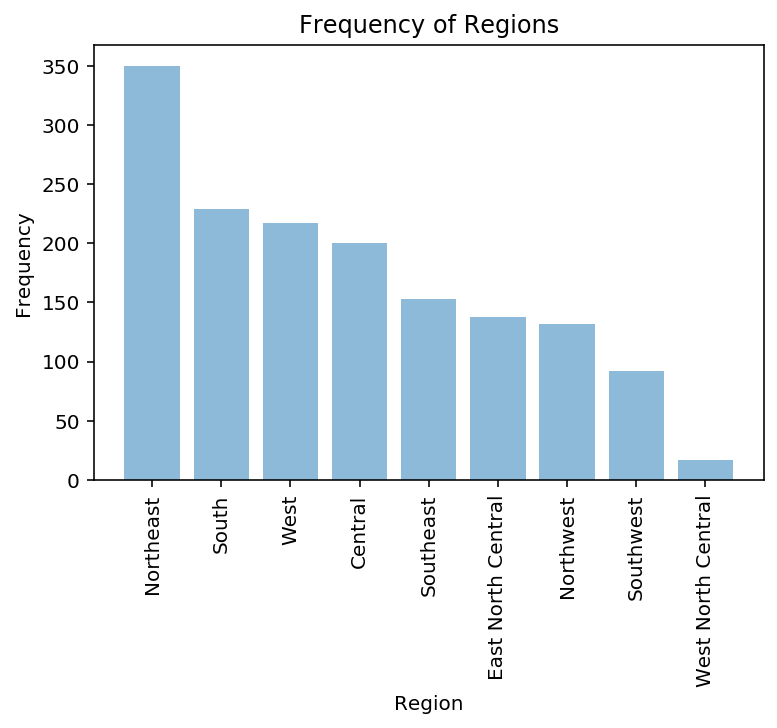

In [5]:
outage["CLIMATE.REGION"].value_counts()
b = outage["CLIMATE.REGION"].value_counts().to_frame().reset_index()

objects = b['index']
y_pos = np.arange(len(objects))
performance = b["CLIMATE.REGION"]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.xlabel('Region')
plt.title('Frequency of Regions')
plt.xticks(rotation = 90)

plt.show()

# Bivariate Analysis
Here we created a graph to compare the Central and Northeast regions to each cause of outage.  We do this in order to determine the possible leading cause of outages.  The x axis shows the different causes while the y axis shows the count for each cause and region.  As a result of observing this graph, we see that the cause of 'severe weather' has the largest frequency in comparison to the other causes.

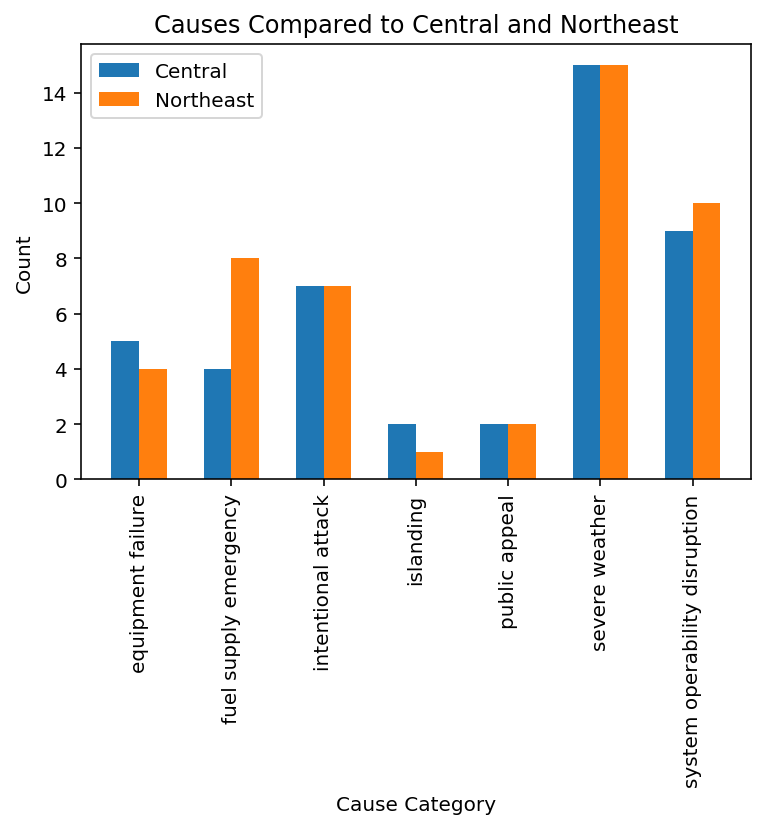

In [6]:
# create copy of filtered_regions
df = filtered_regions
df = df.groupby(['CLIMATE.REGION','CAUSE.CATEGORY']).count().reset_index()

# here we make the double bar plot to compare regions and causes
N = 7
central_vals = df['YEAR'][:7]
northeast_vals = df['YEAR'][7:]

ind = np.arange(N) 
width = 0.3    
plt.bar(ind, central_vals, width, label='Central')
plt.bar(ind + width, northeast_vals, width,
    label='Northeast')

# labels the axis
plt.ylabel('Count')
plt.xlabel('Cause Category')
plt.title('Causes Compared to Central and Northeast')

plt.xticks(ind + width / 2, list(df['CAUSE.CATEGORY'].unique()))
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()


# Interesting Aggregates
By looking at the "CAUSE.CATEGORY.DETAIL" of every row that the cause of the outage was severe weather, we can see in more detail what exactly this means. By looking at the counts below, we can see that the largest proportion of the outages cause by severe weather was specifically from thunderstorms. By noticing this, we can find ways to have residents be overly prepared for an outage about to occur.

We also created a pivot table here in order to observe the leading cause of outages based on our two chosen regions, Central and Northeast.  We wanted to narrow down our investigation to pick one specific cause to analyze how much it actually affects power outages for our regions.  

In [7]:
reasons_sever = outage[outage["CAUSE.CATEGORY"] == 'severe weather']["CAUSE.CATEGORY.DETAIL"].value_counts(normalize = True)
reasons_sever.head()

thunderstorm    0.309028
winter storm    0.175347
hurricanes      0.128472
heavy wind      0.105903
storm           0.071181
Name: CAUSE.CATEGORY.DETAIL, dtype: float64

In [8]:
copy = filtered_regions
copy.pivot_table(index=['CLIMATE.REGION'], columns='CAUSE.CATEGORY', values='YEAR', aggfunc='count')

CAUSE.CATEGORY,equipment failure,fuel supply emergency,intentional attack,islanding,public appeal,severe weather,system operability disruption
CLIMATE.REGION,,,,,,,
Central,5,4,7,2,2,15,9
Northeast,4,8,7,1,2,15,10


### Assessment of Missingness

For the method verify_missingness, we investigate the missingness of the 'CAUSE.CATEGORY.DETAIL' column which may depend on the 'CAUSE.CATEGORY' column.  We suspect that the 'CAUSE.CATEGORY.DETAIL' column may be MAR dependent on the 'CAUSE.CATEGORY' column, therefore we want to investigate its missingness.  This method returns a pvalue which we use to determine the significance in comparison to the observed value.  Our pvalue outcome is under our significance cutoff of 0.1 which shows that the result is significant.  This means that MAR is relevant for the 'CAUSE.CATEGORY.DETAIL' column.  This interesting finding allows us to narrow down our hypothesis and choose these two columns for out test statistic.

For our second test, we investigated the relationship between the 'CAUSE.CATEGORY' column and the 'CAUSE.REGION' column.  There are missing values under the 'CAUSE.REGION' column where we would like to determine if the values are MAR dependent on 'CAUSE.CATEGORY'.  For the comparison between these columns, we see the p-value is above the significance cutoff of 0.1.  We deem this as insignificant, meaning that the columnshave no correlation with one another.  We can conclude that the missingness is not a result of MAR, but instead it is NMAR.

In [9]:
def verify_missingness(df, X, Y, N=1000):
    """
    This method verifies the type of missingness
    for the specified columns we want to compare.
    """
    
    df['bool'] = df[Y].isnull()

    gpA = df.loc[df['bool'] == True, X]
    gpB = df.loc[df['bool'] == False, X]

    obs = ks_2samp(gpA, gpB).statistic
    # print('obs ' + str(obs))

    ks_list = []
    for _ in range(N):

        # shuffle the age column
        shuffled_col = (
            df[X]
            .sample(replace=False, frac=1)
            .reset_index(drop=True)
        )

        # put them in a table
        shuffled = (
            df
            .assign(**{
                X: shuffled_col,
            })
        )

        # compute the KS
        grps = shuffled.groupby('bool')[X]
        ks = ks_2samp(grps.get_group(True), grps.get_group(False)).statistic

        ks_list.append(ks)

    pval = np.mean(pd.Series(ks_list) >= obs)

    return pval


In [10]:
verify_missingness(outage, 'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL', N=100)

0.0

In [11]:
verify_missingness(outage, 'CAUSE.CATEGORY', 'CLIMATE.REGION', N=100)

0.4

Fill all NaN values with a 0 in the table because this means it is not the corresponding 
cause of the outage for that particular outage case. This also makes our hypothesis 
testing results smoother when computing because our table is easier to understand.

In [12]:
#filling all the NaN values with 0
grouped_table = grouped_table.fillna(0)
grouped_table.head()

CAUSE.CATEGORY,CLIMATE.REGION,YEAR,equipment failure,fuel supply emergency,intentional attack,islanding,public appeal,severe weather,system operability disruption
0,Central,2000,2.0,0.0,0.0,0.0,0.0,3.0,0.0
1,Central,2002,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Central,2003,0.0,0.0,1.0,0.0,0.0,4.0,1.0
3,Central,2004,0.0,0.0,0.0,0.0,0.0,5.0,0.0
4,Central,2005,1.0,0.0,0.0,0.0,0.0,4.0,0.0


### Hypothesis Test

Here we find our test statistic for our hypothesis test using difference of means.  This represents our observed statistic and the value remains stagnant.  We specifically use the column for 'severe weather' because we want to compare this cause to the regions of Central and Northeast.

In [13]:
def diff_of_means(data, col= 'severe weather' ):
    """
    This method determines the observed value for the distribution.
    """
    central_mean = data[data["CLIMATE.REGION"] == "Central"][col].mean()
    northeast_mean = data[data["CLIMATE.REGION"] == "Northeast"][col].mean()
    return np.abs(central_mean - northeast_mean)
diff_of_means(grouped_table, 'severe weather')

1.9154411764705888

In our simulate_null method, we simulate our test statistic for the shuffled table in exactly one instance.  We use this to help us find our p-value in the p_value method.  This p-value is changing very drastically each time we run the cell because the amount of rows for our specified dataframe is quite small.  Therefore the values will change very drastically with each sample we take and each shuffle we have.

In [14]:
def simulate_null(data, col='severe weather'):
    """
    This method simulates exactly one iteration of
    the test statistic.
    """
    shuffled_weather = (data[col].sample(replace=False, frac=1).reset_index(drop=True))
    
    # put them in a table
    shuffled = (data.assign(**{'Shuffled weather': shuffled_weather}))
    
    # compute the group differences (test statistic!)
    group_means = (shuffled.groupby("CLIMATE.REGION").mean().loc[:, 'Shuffled weather'])
    difference = group_means.diff().iloc[-1]
    
    # add it to the list of results
    return np.abs(difference)
    
simulate_null(grouped_table)

3.8566176470588243

This shows the p_value for the hypothesis test in order to determine its significance in comparison to its observed value. This helps us determine if our observation is significant.  The histogram shown below shows the frequency of occurences in regards to 'severe weather'.  There is much more frequency for the 0 bin because for a majority of the time 'severe weather' is not the leading cause of outage.  The red dot represents our observed value. Since our observed value lies within the overall distribution, we interpret this result as our observed value being far from our significant value of 0.1.  This relates to our question because it shows our comparison with the observed value to the overall distribution between the two regions.

(<matplotlib.axes._subplots.AxesSubplot at 0x25655d40e48>, 'P_value is: 0.525')

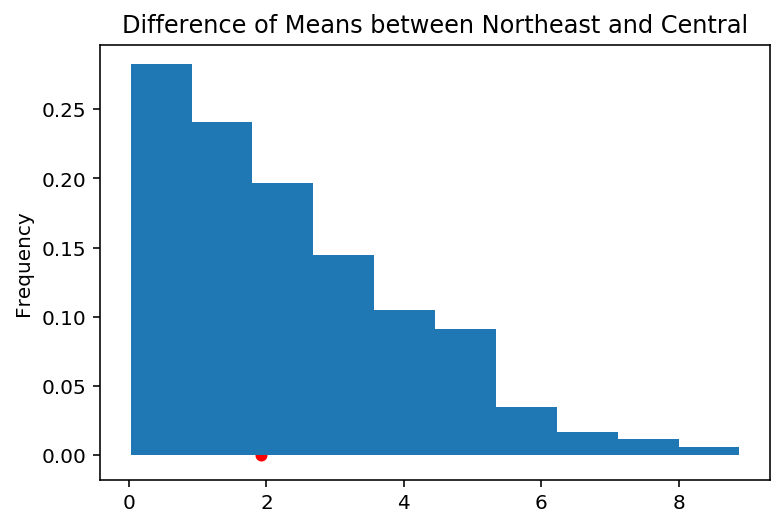

In [15]:
def pval(data, col='severe weather'):
    """
    This method simulates our test statistic 1000
    times in order to obtain a pvalue to compare
    to our observed value.
    """
    
    n_repetitions = 1000
    differences = []
    #simulating the statistic 1000 times 
    for _ in range(n_repetitions):
        difference = simulate_null(data, col='severe weather')
        differences.append(difference)
    observed_difference = diff_of_means(data, col='severe weather')
    p_value = np.count_nonzero(differences >= observed_difference) / n_repetitions
    
    histogram = pd.Series(differences).plot(kind = 'hist', density = True, title = "Difference of Means between Northeast and Central")
    plt.scatter([observed_difference], [0], s=25, c = 'r')
    return histogram, ("P_value is: " + str(p_value))

pval(grouped_table, col='severe weather')       